# DATA & Define function

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca

from scipy.cluster.hierarchy import dendrogram, linkage   # dendrograms
from sklearn.cluster         import KMeans                # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
df = pd.read_excel('survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
df.isnull().any().any()

False

In [4]:
# summary of decriptive statistics
df.describe(include = 'number').round(2)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

# OCEAN PERSONALITY

## PCA

1. Am the life of the party
2. Feel little concern for others
3. Am always prepared
4. Get stressed out easily 
5. Have a rich vocabulary
6. Don't talk a lot
7. Am interested in people
8. Leave my belongings around
9. Am relaxed most of the time
10. Have difficulty understanding abstract ideas
11. Feel comfortable around people
12. Insult people
13. Pay attention to details
14. Worry about things
15. Have a vivid imagination
16. Keep in the background
17. Sympathize with others' feelings
18. Make a mess of things
19. Seldom feel blue
20. Am not interested in abstract ideas
21. Start conversations
22. Am not interested in other people's problems
23. Get chores done right away
24. Am easily disturbed
25. Have excellent ideas
26. Have little to say
27. Have a soft heart
28. Often forget to put things back in their proper place
29. Get upset easily
30. Do not have a good imagination
31. Talk to a lot of different people at parties
32. Am not really interested in others
33. Like order
34. Change my mood a lot
35. Am quick to understand things
36. Don't like to draw attention to myself
37. Take time out for others
38. Shirk my duties
39. Have frequent mood swings
40. Use difficult words
41. Don't mind being the center of attention
42. Feel others' emotions
43. Follow a schedule
44. Get irritated easily
45. Spend time reflecting on things
46. Am quiet around strangers
47. Make people feel at ease
48. Am exacting in my work
49. Often feel blue
50. Am full of ideas

       
- FORMULA: 
1. E = 20 + (1) ___ - (6) ___ + (11) ___ - (16) ___ + (21) ___ - (26) ___ + (31) ___ - (36) ___ + (41) ___ - (46) ___ 

2. A = 14 - (2) ___ + (7) ___ - (12) ___ + (17) ___ - (22) ___ + (27) ___ - (32) ___ + (37) ___ + (42) ___ + (47) ___ 

3. C = 14 + (3) ___ - (8) ___ + (13) ___ - (18) ___ + (23) ___ - (28) ___ + (33) ___ - (38) ___ + (43) ___ + (48) ___ 

4. N = 38 - (4) ___ + (9) ___ - (14) ___ + (19) ___ - (24) ___ - (29) ___ - (34) ___ - (39) ___ - (44) ___ - (49) ___ 

5. O = 8 + (5) ___ - (10) ___ + (15) ___ - (20) ___ + (25) ___ - (30) ___ + (35) ___ + (40) ___ + (45) ___ + (50) ___ 

Reference
https://stars.library.ucf.edu/cgi/viewcontent.cgi?article=1270&context=honorstheses

In [5]:
df['Extrovert']         = 20 + df["Am the life of the party"] - df["Don't talk a lot"] + df["Feel comfortable around people"] - \
                            df["Keep in the background"] + df["Start conversations"] - df["Have little to say"] + \
                            df["Talk to a lot of different people at parties"] - df["Don't like to draw attention to myself"] + \
                            df["Don't mind being the center of attention"] -  df["Am quiet around strangers"]

df['Agreeableness']     = 14 - df["Feel little concern for others"] + df["Am interested in people"] - df["Insult people"] +\
                            df["Sympathize with others' feelings"]- df["Am not interested in other people's problems"] +\
                            df["Have a soft heart"] - df["Am not really interested in others"] + \
                            df["Take time out for others"] + df["Feel others' emotions"] + df["Make people feel at ease"] 


df['Conscientiousness'] = 14 + df["Am always prepared"]- df["Leave my belongings around"] + df["Pay attention to details"] -\
                            df["Make a mess of things"] + df["Get chores done right away"] - \
                            df["Often forget to put things back in their proper place"] + df["Like order"] - \
                            df["Shirk my duties"] + df["Follow a schedule"] + df["Am exacting in my work"] 

df['Neuroticism']       = 38 - df["Get stressed out easily"] + df["Am relaxed most of the time"] - df["Worry about things"] +\
                            df["Seldom feel blue"] - df["Am easily disturbed"] - df["Get upset easily"] - \
                            df["Change my mood a lot"] - df["Have frequent mood swings"]- \
                            df["Get irritated easily"]- df["Often feel blue"]


df['Openness']          = 8 + df["Have a rich vocabulary"]- df["Have difficulty understanding abstract ideas"] +\
                            df["Have a vivid imagination"] - df["Am not interested in abstract ideas"] + df['Have excellent ideas'] -\
                            df["Do not have a good imagination"] + df["Am quick to understand things"] + \
                            df["Use difficult words"] + df["Spend time reflecting on things"] + df["Am full of ideas"] 

In [6]:
df_2 = df[['Extrovert', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']]


In [7]:
 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_2)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(df_2)


# converting scaled data into a DataFrame
df_scaled = pd.DataFrame(X_scaled)


# reattaching column names
df_scaled.columns = df_2.columns


# checking pre- and post-scaling variance
print(pd.np.var(df_2), '\n\n')
print(pd.np.var(df_scaled))

Extrovert            43.033300
Agreeableness        31.442059
Conscientiousness    30.336619
Neuroticism          46.906282
Openness             27.372050
dtype: float64 


Extrovert            1.0
Agreeableness        1.0
Conscientiousness    1.0
Neuroticism          1.0
Openness             1.0
dtype: float64


<ipython-input-7-e39af3db6b62>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(df_2), '\n\n')
<ipython-input-7-e39af3db6b62>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(df_scaled))


Original shape: (137, 5)
PCA shape     : (137, 5)


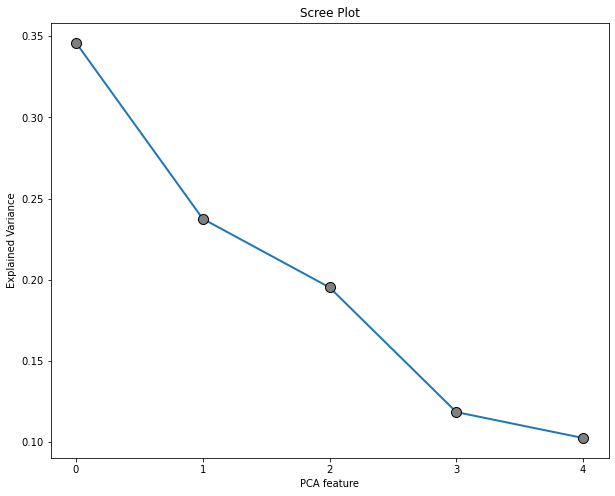

In [8]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None, 
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(df_2)


# comparing dimensions of each DataFrame
print("Original shape:", df_scaled.shape)
print("PCA shape     :", customer_pca.shape)

# calling the scree_plot function
scree_plot(pca_object = pca)

In [9]:
# component number counter
component_number = 0

# looping over each principal component
# explained variance similar to confusion matrix 
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.346
PC 2 : 0.238
PC 3 : 0.195
PC 4 : 0.119
PC 5 : 0.103


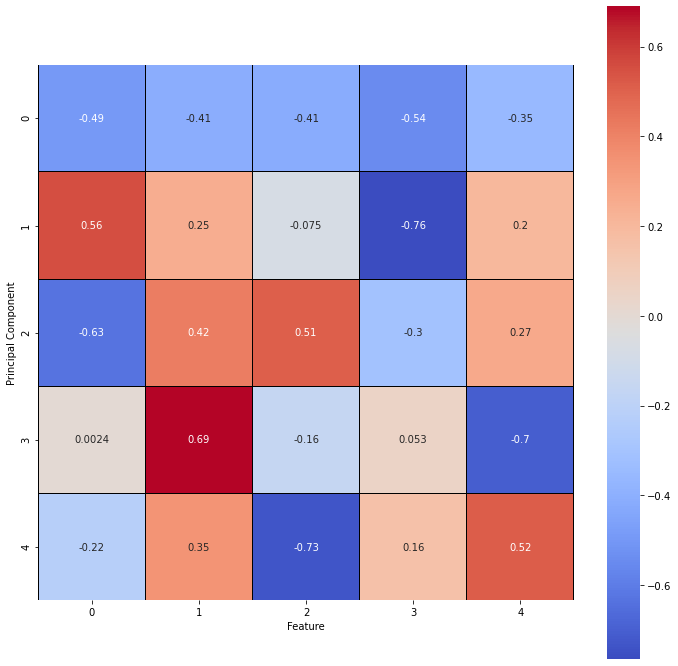

In [10]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

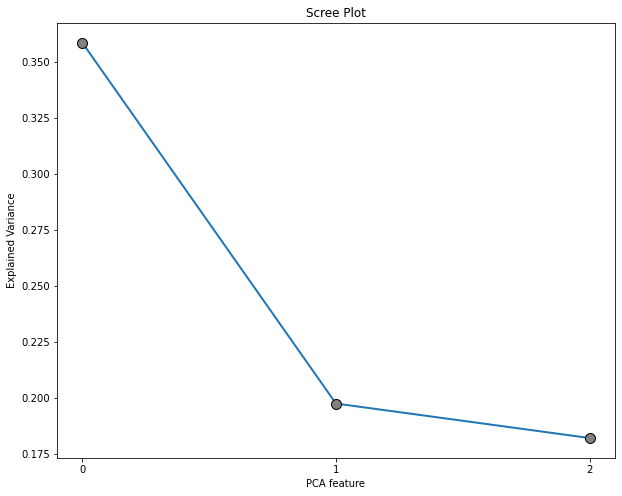

In [11]:
# INSTANTIATING a new model using 4 principal components
pca_2 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the df_scaled
consumer_pca_2 = pca_2.fit_transform(df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_2)

In [12]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(df_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(df_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Extrovert         -0.49  0.56 -0.63  0.00 -0.22
Agreeableness     -0.41  0.25  0.42  0.69  0.35
Conscientiousness -0.41 -0.07  0.51 -0.16 -0.73
Neuroticism       -0.54 -0.76 -0.30  0.05  0.16
Openness          -0.35  0.20  0.27 -0.70  0.52


3 Components Factor Loadings
------------------------------
                      0     1     2
Extrovert         -0.36  0.52 -0.68
Agreeableness     -0.51  0.19  0.27
Conscientiousness -0.52 -0.35  0.36
Neuroticism       -0.30 -0.72 -0.55
Openness          -0.50  0.23  0.17



<ipython-input-12-42e852741ae1>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-12-42e852741ae1>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


## CLUSTER

In [13]:
# naming each principal component
factor_loadings_2.columns = ['Calmness',                 
                              'Chiller',          
                              'Concientiousness'] 


# checking the result
factor_loadings_2

,Calmness,Chiller,Concientiousness
Extrovert,-0.356778,0.519424,-0.683433
Agreeableness,-0.512719,0.190331,0.269625
Conscientiousness,-0.517428,-0.352309,0.364181
Neuroticism,-0.302406,-0.718096,-0.547915
Openness,-0.500647,0.232789,0.165481


In [14]:
# analyzing factor strengths per customer
X_pca_reduced = pca_2.transform(df_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_2.columns


# checking the results
X_pca_df

,Calmness,Chiller,Concientiousness
0,-0.021091,-0.237649,0.122182
1,0.298578,-0.306639,0.843163
2,0.636433,-1.540068,-1.740577
3,0.157214,0.605706,0.420821
4,1.706482,0.517452,-0.370428
5,1.996393,1.119690,0.959050
6,1.214815,1.025901,0.661974
7,-1.312541,-0.324142,-1.268575
8,0.918573,-0.863280,0.110127
9,-1.676962,-0.506733,0.422601


In [15]:
X_pca_df.to_excel('PCA Factor Loadings.xlsx',
                  index = False)

In [16]:
# checking variance amongst clusters
np.var(X_pca_df)

Calmness            1.792832
Chiller             0.986934
Concientiousness    0.909896
dtype: float64

In [17]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Calmness',                 
                      'Chiller',          
                      'Concientiousness'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Calmness            1.792832
Chiller             0.986934
Concientiousness    0.909896
dtype: float64 


Calmness            1.0
Chiller             1.0
Concientiousness    1.0
dtype: float64


<ipython-input-17-c0c86e7b9882>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-17-c0c86e7b9882>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


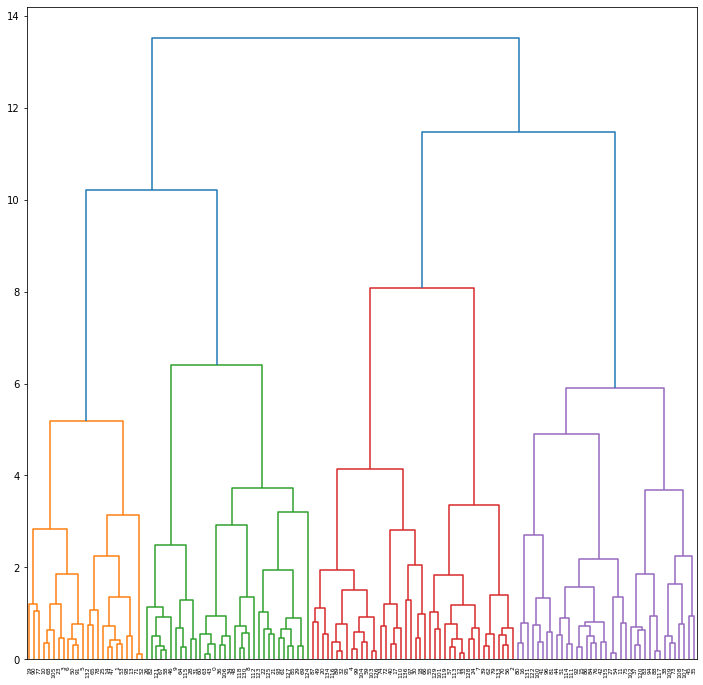

In [18]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.show()

In [19]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    34
0    29
3    26
2    26
4    22
Name: Cluster, dtype: int64


In [20]:

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Calmness',                 # No Vegan, No Vege, No Indian
                            'Chiller',          # No Med, No ME, No Wine
                            'Conscientiousness'] # Med, No Wine


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)


,Calmness,Chiller,Conscientiousness
0,1.18,0.27,-0.50
1,-0.12,-0.91,0.79
2,-0.25,-0.64,-1.08
3,-1.18,0.69,-0.43
4,0.32,0.98,1.23


In [21]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([df.loc[ : , ['What laptop do you currently have?', 
                                             'What laptop would you buy in next assuming if all laptops cost the same?']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current_laptop',
                              'Next_laptop',
                              'Clusters',
                              'Calmness',
                              'Chiller',
                              'Conscientiousness']


# checking the results
print(final_pca_clust_df.head(n = 5))

   Current_laptop     Next_laptop  Clusters  Calmness   Chiller  Conscientiousness
0         Macbook         Macbook         1 -0.021091 -0.237649           0.122182
1  Windows laptop  Windows laptop         1  0.298578 -0.306639           0.843163
2  Windows laptop  Windows laptop         2  0.636433 -1.540068          -1.740577
3  Windows laptop  Windows laptop         4  0.157214  0.605706           0.420821
4         Macbook  Windows laptop         0  1.706482  0.517452          -0.370428


In [22]:
# renaming channels
current_names = {1 : 'Mac',
                 2 : 'Window',
                 3 : 'Chromebook'}


final_pca_clust_df['Current_laptop'].replace(current_names, inplace = True)



# renaming regions
next_names =   {1 : 'Mac',
                2 : 'Window',
                3 : 'Chromebook'}


final_pca_clust_df['Next_laptop'].replace(next_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Clusters'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df


,Current_laptop,Next_laptop,Clusters,Calmness,Chiller,Conscientiousness
0,Macbook,Macbook,Cluster 2,-0.021091,-0.237649,0.122182
1,Windows laptop,Windows laptop,Cluster 2,0.298578,-0.306639,0.843163
2,Windows laptop,Windows laptop,Cluster 3,0.636433,-1.540068,-1.740577
3,Windows laptop,Windows laptop,Cluster 5,0.157214,0.605706,0.420821
4,Macbook,Windows laptop,Cluster 1,1.706482,0.517452,-0.370428
5,Macbook,Macbook,Cluster 5,1.996393,1.119690,0.959050
6,Windows laptop,Macbook,Cluster 5,1.214815,1.025901,0.661974
7,Windows laptop,Windows laptop,Cluster 3,-1.312541,-0.324142,-1.268575
8,Macbook,Macbook,Cluster 2,0.918573,-0.863280,0.110127
9,Windows laptop,Chromebook,Cluster 2,-1.676962,-0.506733,0.422601


## Current Laptop

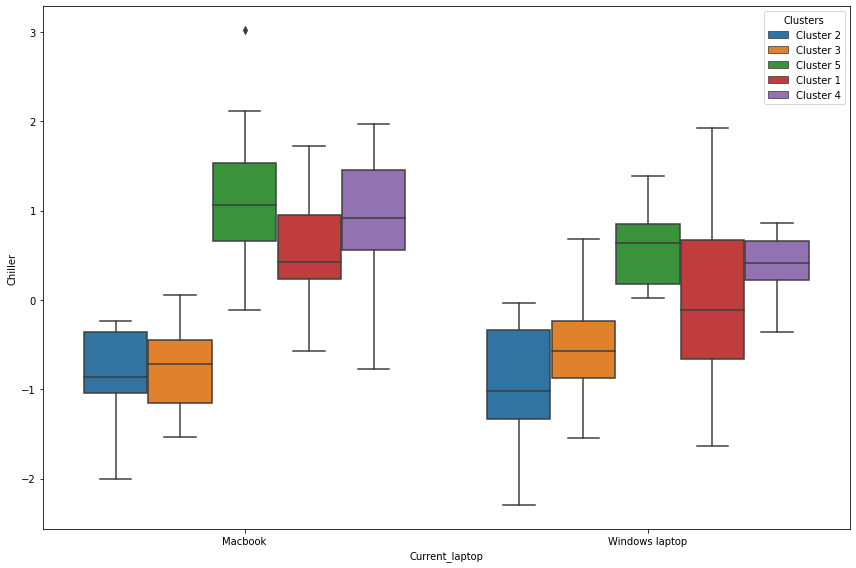

In [23]:
########################
# Current laptop
########################

#Calmness
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Chiller',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

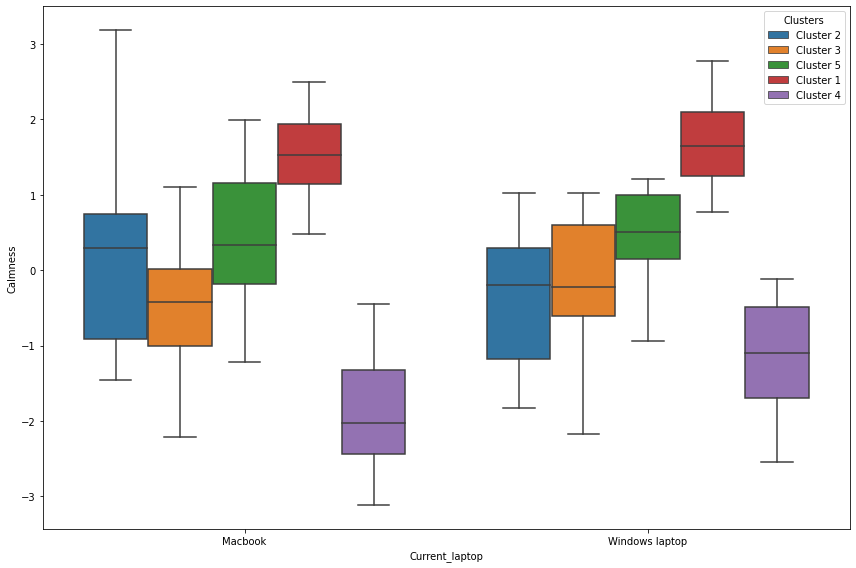

In [24]:
########################
# Current laptop
########################

#Calmness
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Calmness',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

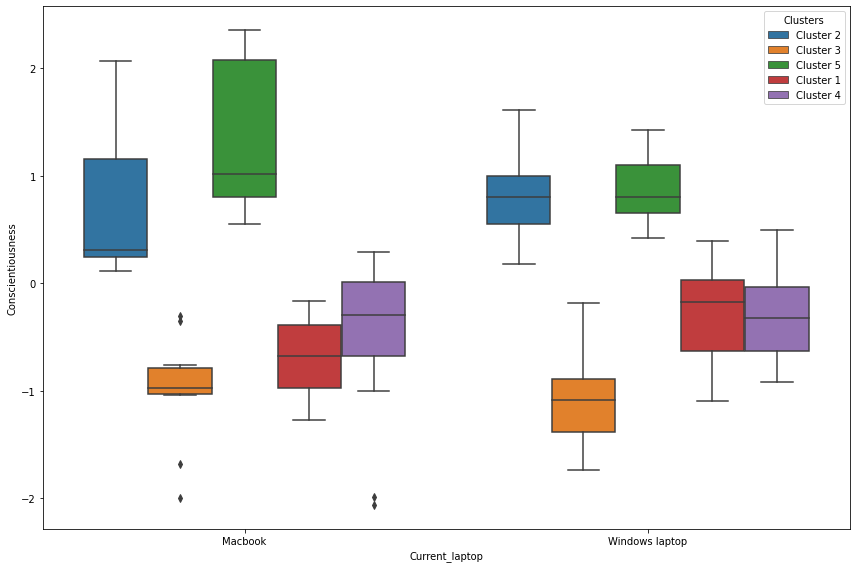

In [25]:
########################
# Current laptop
########################

#Conscientiousness
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Conscientiousness',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## Next Laptop

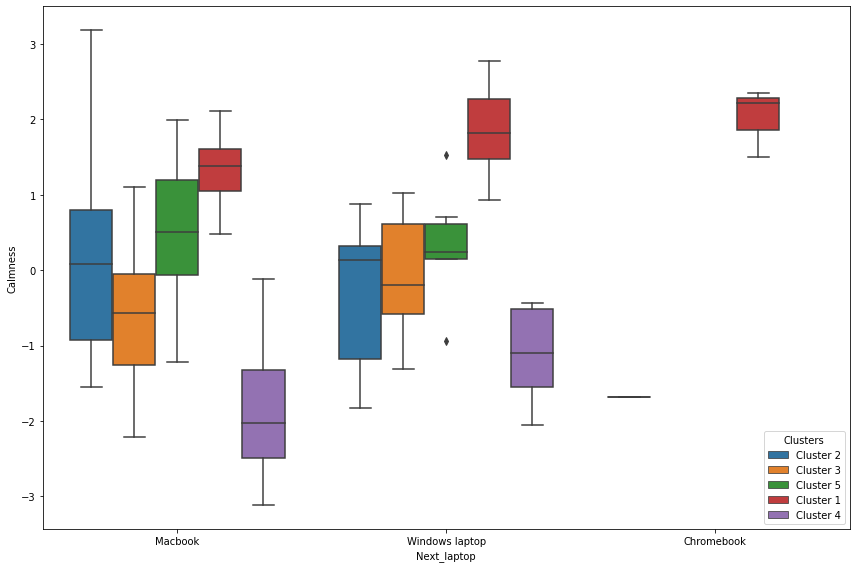

In [26]:
########################
# Next laptop
########################

#Calmness
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_laptop',
            y = 'Calmness',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

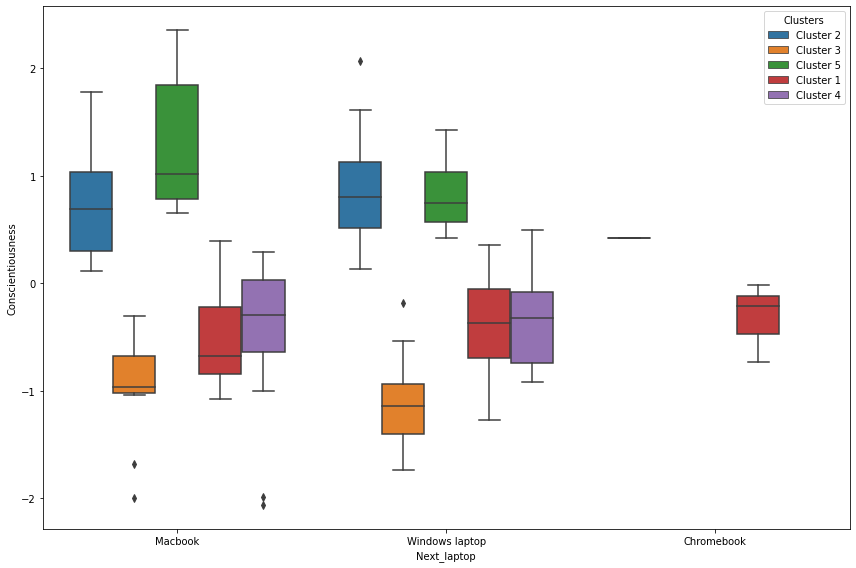

In [27]:
########################
# Next laptop
########################

#Calmness
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_laptop',
            y = 'Conscientiousness',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

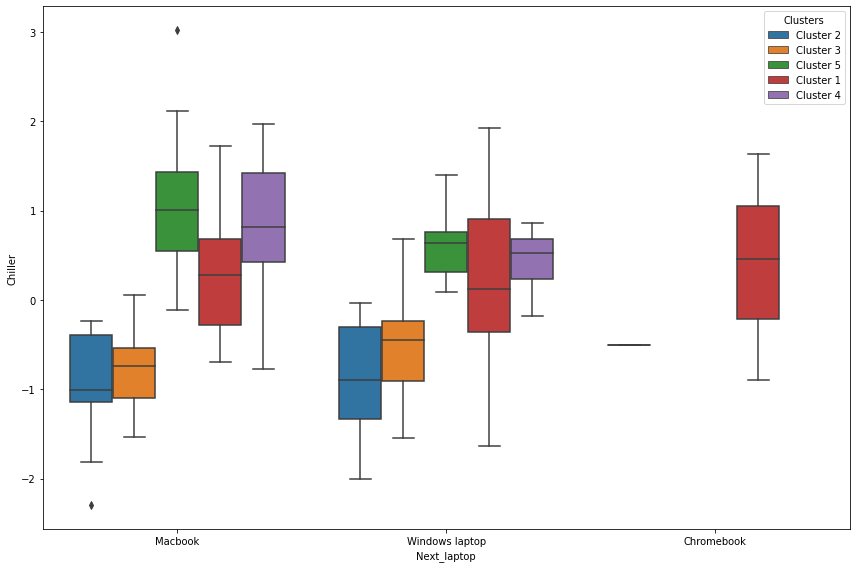

In [28]:
########################
# Next laptop
########################

#Chiller
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_laptop',
            y = 'Chiller',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# HULT DNA

## PCA

HULT DNA:
- 'See underlying patterns in complex situations', 
- 'Don't  generate ideas that are new and different', 
- 'Demonstrate an awareness of personal strengths and limitations', 
- 'Display a growth mindset', 
- 'Respond effectively to multiple priorities',
- 'Take initiative even when circumstances, objectives, or rules aren't clear', 
- 'Encourage direct and open discussions',
- 'Listen carefully to others', 
- 'Don't persuasively sell a vision or idea', 
- 'Build cooperative relationships', 
- 'Work well with people from diverse cultural backgrounds', 
- 'Effectively negotiate interests, resources, and roles', 
- 'Can't rally people on the team around a common goal',
- 'Translate ideas into plans that are organized and realistic', 
- 'Resolve conflicts constructively', 
- 'Seek and use feedback from teammates', 
- 'Coach teammates for performance and growth', 
- 'Drive for results'


In [29]:
df['Action']         = df["See underlying patterns in complex situations"] + \
                            df["Demonstrate an awareness of personal strengths and limitations"] +\
                            df["Display a growth mindset"] +\
                            df["Take initiative even when circumstances, objectives, or rules aren't clear"] + \
                            df["Don't persuasively sell a vision or idea"] + \
                            df["Coach teammates for performance and growth"] 
                           
df['People']         =  df["Listen carefully to others"] +\
                            df["Build cooperative relationships"] +\
                            df["Work well with people from diverse cultural backgrounds"]+ \
                            df["Effectively negotiate interests, resources, and roles"] +\
                            df["Resolve conflicts constructively"] +\
                            df['Seek and use feedback from teammates']
                           

df['System']         = df["Don't  generate ideas that are new and different"]+ \
                            df["Respond effectively to multiple priorities"] + \
                            df["Encourage direct and open discussions"] +\
                            df["Translate ideas into plans that are organized and realistic"] +\
                            df["Drive for results"] + \
                            df["Can't rally people on the team around a common goal"] 

In [30]:
df_3 = df[['Action', 'People', 'System']]

In [31]:
 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_3)


# TRANSFORMING our data after fit
X_scaled_2 = scaler.transform(df_3)


# converting scaled data into a DataFrame
df_scaled_2 = pd.DataFrame(X_scaled_2)


# reattaching column names
df_scaled_2.columns = df_3.columns


# checking pre- and post-scaling variance
print(pd.np.var(df_3), '\n\n')
print(pd.np.var(df_scaled_2))

Action    7.955245
People    9.785071
System    5.520912
dtype: float64 


Action    1.0
People    1.0
System    1.0
dtype: float64


<ipython-input-31-0417be76cc1f>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(df_3), '\n\n')
<ipython-input-31-0417be76cc1f>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(df_scaled_2))


In [32]:
# INSTANTIATING a PCA object with no limit to principal components
pca_3 = PCA(n_components = 3, 
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca_3 = pca_3.fit_transform(df_3)


# comparing dimensions of each DataFrame
print("Original shape:", df_scaled_2.shape)
print("PCA shape     :", customer_pca_3.shape)

Original shape: (137, 3)
PCA shape     : (137, 3)


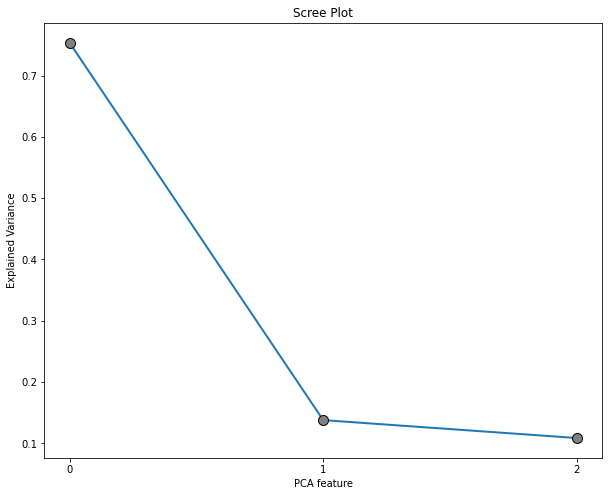

In [33]:
# calling the scree_plot function
scree_plot(pca_object = pca_3)

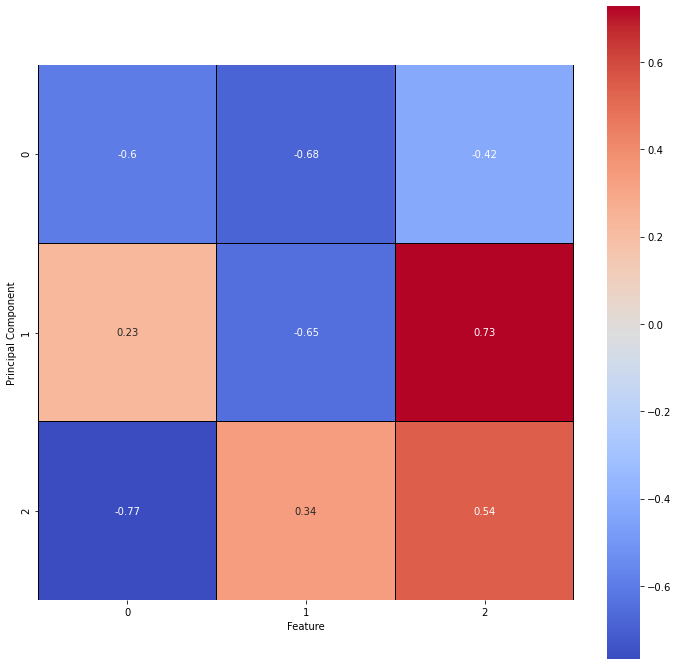

In [34]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca_3.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

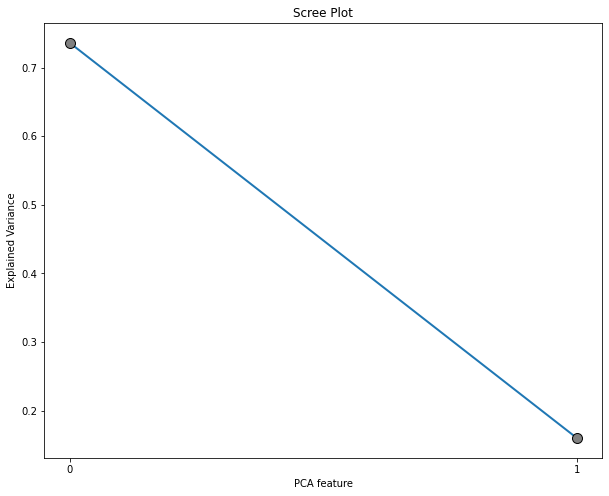

In [35]:
# INSTANTIATING a new model using 2 principal components
pca_4 = PCA(n_components = 2,
            random_state = 219)


# FITTING and TRANSFORMING the df_scaled
consumer_pca_4 = pca_4.fit_transform(df_scaled_2)


# calling the scree_plot function
scree_plot(pca_object = pca_4)

In [36]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(df_scaled_2.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_4 = pd.DataFrame(pd.np.transpose(pca_4.components_))


# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(df_scaled_2.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_4.round(2)}
""")


MAX Components Factor Loadings
------------------------------
           0     1     2
Action -0.60  0.23 -0.77
People -0.68 -0.65  0.34
System -0.42  0.73  0.54


3 Components Factor Loadings
------------------------------
           0     1
Action -0.60  0.27
People -0.58  0.50
System -0.55 -0.82



<ipython-input-36-083656a5af3a>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))
<ipython-input-36-083656a5af3a>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_4 = pd.DataFrame(pd.np.transpose(pca_4.components_))


## CLUSTER

In [37]:
# naming each principal component
factor_loadings_4.columns = ['Carefree',                 
                              'Thinking'] 


# checking the result
factor_loadings_4

,Carefree,Thinking
Action,-0.597115,0.268898
People,-0.583686,0.500613
System,-0.550240,-0.822849


In [38]:
# analyzing factor strengths per customer
X_pca_reduced_2 = pca_4.transform(df_scaled_2)


# converting to a DataFrame
X_pca_df_2 = pd.DataFrame(X_pca_reduced_2)


# renaming columns
X_pca_df_2.columns = factor_loadings_4.columns


# checking the results
X_pca_df_2

,Carefree,Thinking
0,0.261315,0.375651
1,0.007301,-0.800919
2,2.018631,-1.251417
3,-2.240845,-0.319784
4,1.665279,-0.104972
5,1.526269,0.565300
6,-1.071059,-1.150606
7,0.261315,0.375651
8,0.004663,-0.420084
9,-1.003640,0.186001


In [39]:
X_pca_df_2.to_excel('PCA Factor Loadings_2.xlsx',
                  index = False)

In [40]:
# checking variance amongst clusters
np.var(X_pca_df_2)

Carefree    2.208672
Thinking    0.480031
dtype: float64

In [41]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df_2)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df_2)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Carefree',                 
                      'Thinking'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Calmness            1.792832
Chiller             0.986934
Concientiousness    0.909896
dtype: float64 


Carefree    1.0
Thinking    1.0
dtype: float64


<ipython-input-41-e999d6681318>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-41-e999d6681318>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


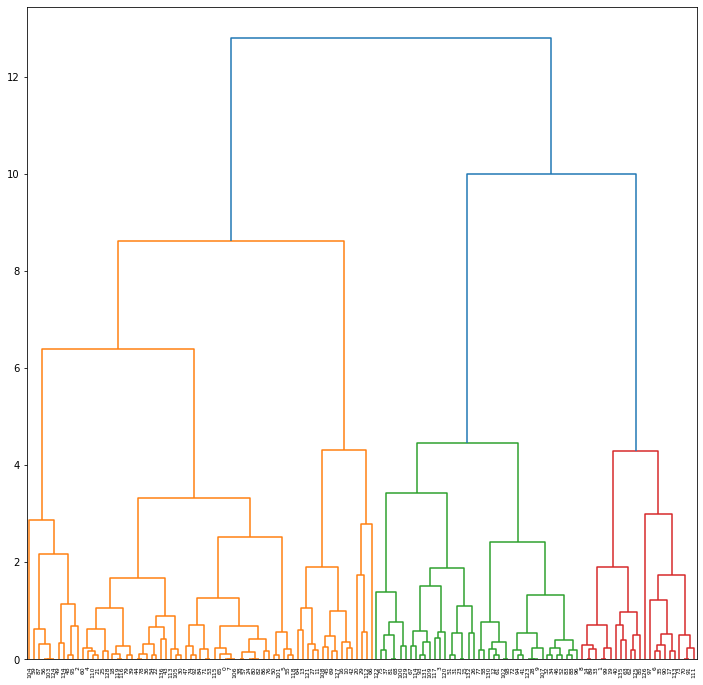

In [42]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.show()

In [43]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 3,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    54
2    51
1    32
Name: Cluster, dtype: int64


In [44]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Carefree',                 
                            'Thinking'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Carefree,Thinking
0,0.84,0.25
1,-0.12,-1.30
2,-0.82,0.55


In [45]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df_2],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([df.loc[ : , ['What laptop do you currently have?', 
                                             'What laptop would you buy in next assuming if all laptops cost the same?']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current_laptop',
                              'Next_laptop',
                              'Clusters',
                              'Carefree',
                              'Thinking']


# checking the results
print(final_pca_clust_df.head(n = 5))

   Current_laptop     Next_laptop  Clusters  Carefree  Thinking
0         Macbook         Macbook         0  0.261315  0.375651
1  Windows laptop  Windows laptop         1  0.007301 -0.800919
2  Windows laptop  Windows laptop         1  2.018631 -1.251417
3  Windows laptop  Windows laptop         2 -2.240845 -0.319784
4         Macbook  Windows laptop         0  1.665279 -0.104972


In [46]:
# renaming channels
current_names = {1 : 'Mac',
                 2 : 'Window',
                 3 : 'Chromebook'}


final_pca_clust_df['Current_laptop'].replace(current_names, inplace = True)



# renaming regions
next_names =   {1 : 'Mac',
                2 : 'Window',
                3 : 'Chromebook'}


final_pca_clust_df['Next_laptop'].replace(next_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Clusters'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df_2 = final_pca_clust_df


# checking results
data_df_2


,Current_laptop,Next_laptop,Clusters,Carefree,Thinking
0,Macbook,Macbook,Cluster 1,0.261315,0.375651
1,Windows laptop,Windows laptop,Cluster 2,0.007301,-0.800919
2,Windows laptop,Windows laptop,Cluster 2,2.018631,-1.251417
3,Windows laptop,Windows laptop,Cluster 3,-2.240845,-0.319784
4,Macbook,Windows laptop,Cluster 1,1.665279,-0.104972
5,Macbook,Macbook,Cluster 1,1.526269,0.565300
6,Windows laptop,Macbook,Cluster 2,-1.071059,-1.150606
7,Windows laptop,Windows laptop,Cluster 1,0.261315,0.375651
8,Macbook,Macbook,Cluster 2,0.004663,-0.420084
9,Windows laptop,Chromebook,Cluster 3,-1.003640,0.186001


## Current Laptop 

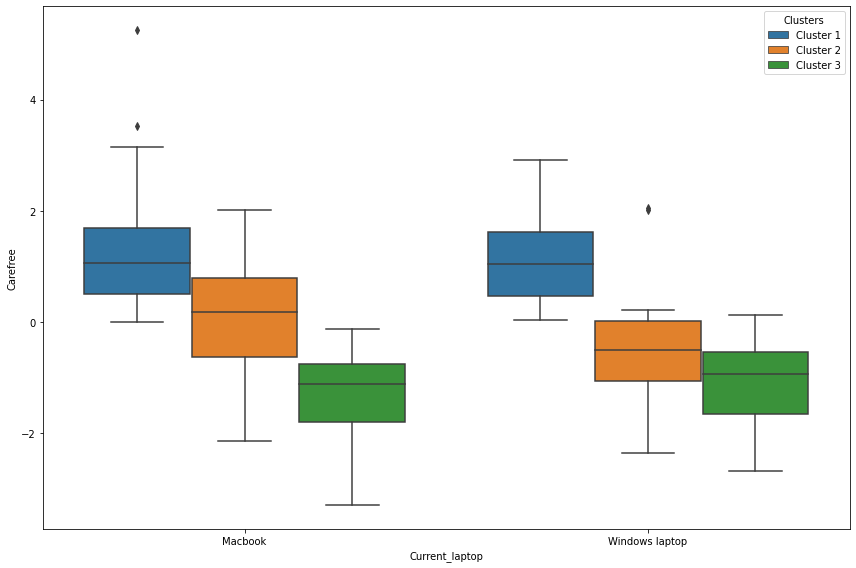

In [47]:
########################
# Current laptop
########################

#Carefree
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Carefree',
            hue = 'Clusters',
            data = data_df_2)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

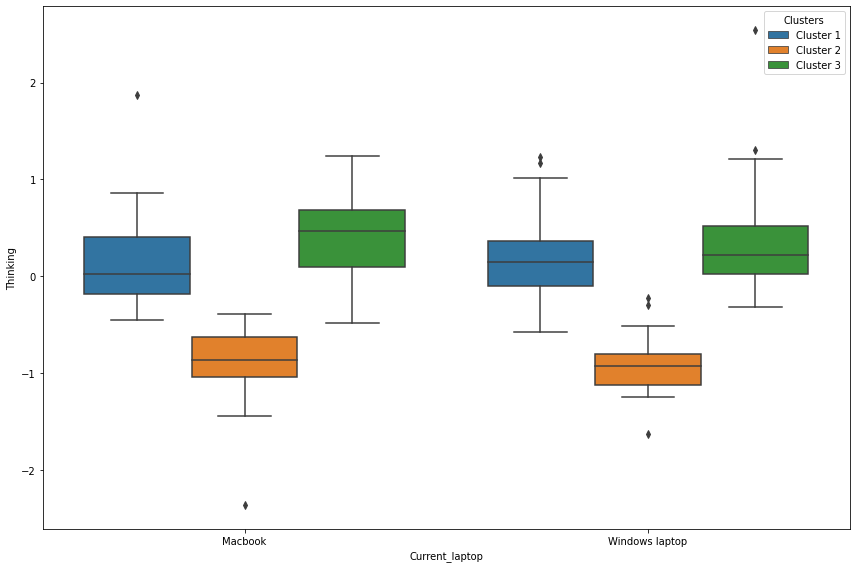

In [48]:
########################
# Current laptop
########################

#Thinking
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Thinking',
            hue = 'Clusters',
            data = data_df_2)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## Next Laptop

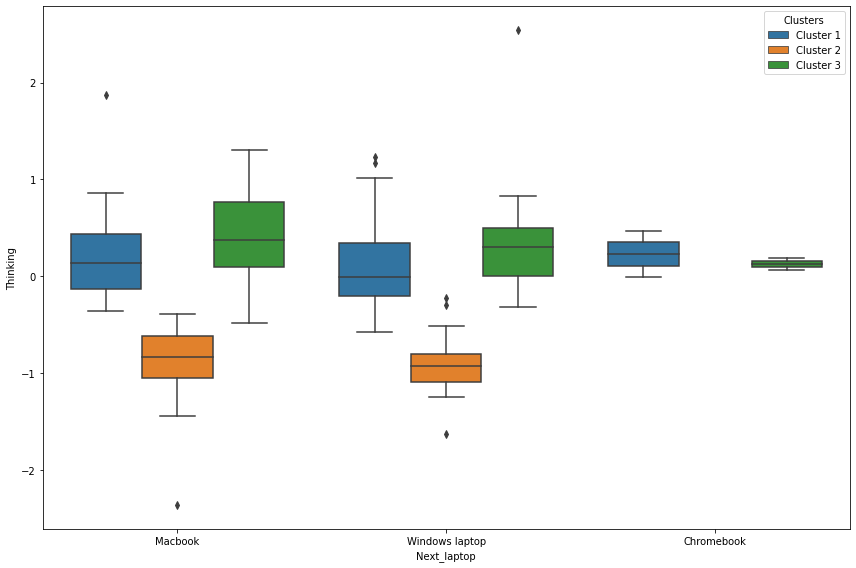

In [49]:
########################
# Next laptop
########################

#Thinking
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_laptop',
            y = 'Thinking',
            hue = 'Clusters',
            data = data_df_2)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

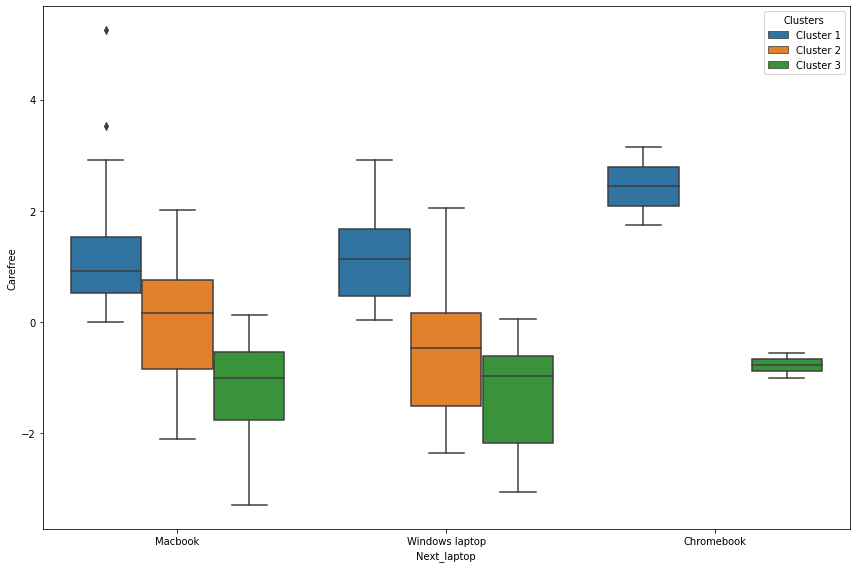

In [50]:
########################
# Next laptop
########################

#Thinking
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next_laptop',
            y = 'Carefree',
            hue = 'Clusters',
            data = data_df_2)


# formatting and displaying the plot
plt.tight_layout()
plt.show()